# Nadia Richer

## Research Question

How does the number of children an individual has influence their insurance charges?

### Context
I plan to examine the relationship between number of children and insurance charges. I want to do this by analyzing this relationship in a general context, as well as combined with other variables like age and gender. I am interested in whether insurance charges based on children are similar in men and women, or if there are identifiable differences. I am also curious about how insurance charges differ between age groups, based on number of children.


### Rough Analysis Plan
1. Identifying research question and key variables
- Key variables will include number of children, age, gender, and insurance charges. Identifying these will allow me to clean the data effectively. 
2. Data cleaning
- Remove any NaN values from the dataset.
- Remove any irrelevant data or outliers. 
- Drop columns that are irrelevant to my analysis.
    - Including BMI, smoker, and region 
3. Shaping data by adding new columns, calculations, etc.
- Calculations may include:
    - Percentage of male vs. female with 1 child, 2 children, 3 children, etc.
    - Percentage of 10 year-age increments with 1 child, 2 children, 3 children, etc.
- New columns may include:
    - Number of children by gender
    - Number of children by age increments
4. Exploring different plots to visualize my data and relationships
- I will use the Seaborn tutorial and experience from Lab 5 to start thinking about how I can effectively answer my research question through the use of plots.

# Exploratory Data Analysis (Milestone 3)

-----
### Task 1: Conduct an EDA.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/raw/insurance.csv")
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'Insurance Charges')

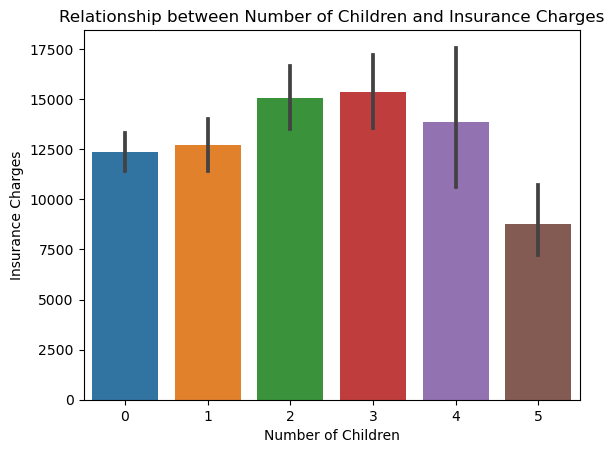

In [ ]:
bplot = sns.barplot(data=df,y="charges",x="children")
bplot.set_title("Relationship between Number of Children and Insurance Charges")
bplot.set_xlabel("Number of Children")
bplot.set_ylabel("Insurance Charges")

#### Observations
- People with 0 children do not have the lowest charges.
    - This contradicts my personal understanding. I would think that those individuals with no children would have the lowest charges. There must be some mediating factors here. 
- There is only a very slight increase in charges when an individual has 1 child versus no children. 
- There is a sharp increase in charges when an individual has another child (2 children).
- After 3 children, charges begin to decline.
    - This contradicts my personal understanding. I would think that insurance charges continue increasing with the number of children. There must be some mediating factors here. 

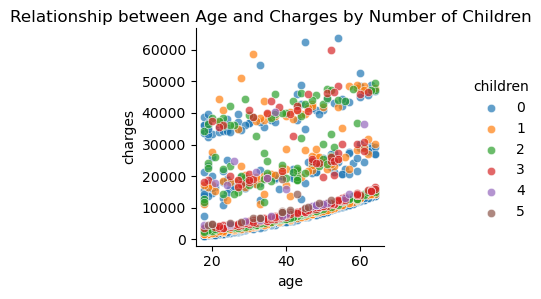

In [ ]:
fgrid = sns.FacetGrid(data=df, hue="children")
fgrid.map(sns.scatterplot, "age" ,"charges", alpha=.7)
fgrid.add_legend()
fgrid.fig.suptitle("Relationship between Age and Charges by Number of Children")
fgrid.fig.subplots_adjust(top=0.92)

#### Observations
- When considering age, more linear relationships begin to appear. 
- Age appears to be a more relevant indicator of higher charges than number of children. 
- Number of children appears to be randomly scattered, and does not seem to be an indicator of any solid relationship with increased charges. 

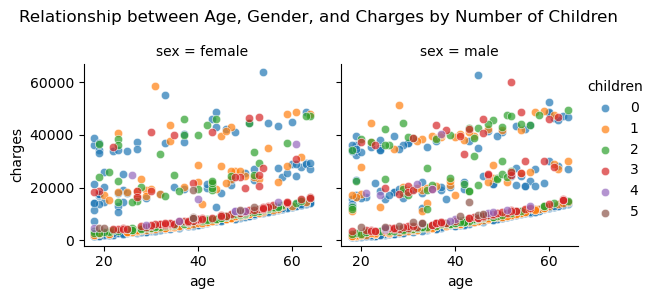

In [ ]:
fgrid_sex = sns.FacetGrid(data=df, col="sex", hue="children")
fgrid_sex.map(sns.scatterplot, "age" ,"charges", alpha=.7)
fgrid_sex.add_legend()
fgrid_sex.fig.suptitle("Relationship between Age, Gender, and Charges by Number of Children")
fgrid_sex.fig.subplots_adjust(top=0.80)

#### Observations
- This scatterplot is a replication of the plot above, but now separated by sex to see if there are any differences.
- There does not appear to be any notable differences between sexes in this relationship.
    - Females and males have consistent charges in relation to their age and number of children.
- After considering sex, age remains the most relevant indicator of higher charges.

------
### Task 2: Refine your Research Question.

After doing an EDA, I believe my research question is still viable. However, in my original research question context, I stated that I would likely only consider age and sex, and drop the other columns. After doing a bit of EDA, I realized this would not give my research question enough breadth for an entire project.

While I don't think I will change my research question at this point, I will amend my rough analysis plan. The dataset we chose is already very clean, and I think I will consider all columns including age, sex, smoker, region, and BMI. 

### Changes to Analysis Plan
1. Identifying research question and key variables
- Key variables will include number of children, age, gender, and insurance charges. Identifying these will allow me to clean the data effectively. 
2. Data cleaning
- Remove any NaN values from the dataset. 
- Remove any irrelevant data or outliers. 
- Drop any columns irrelevant to my analysis. 
    - **Will no longer be dropping smoker, region, and BMI columns as my research context needs more breadth.**
3. Shaping data by adding new columns, calculations, etc.
- Calculations may include:
    - Percentage of male vs. female with 1 child, 2 children, 3 children, etc.
    - Percentage of 10 year-age increments with 1 child, 2 children, 3 children, etc.
- New columns may include:
    - Number of children by gender
    - Number of children by age increments 
4. Exploring different plots to visualize my data and relationships
- I will use the Seaborn tutorial and experience from Lab 5 to start thinking about how I can effectively answer my research question through the use of plots.
- **Use of FacetGrids to plot multiple variables on the same grids.**